#### Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os


In [24]:
X = pd.read_csv("X_data.csv")
Y = pd.read_csv("Y_data.csv")

In [28]:
Y.shape

(500, 1)

In [14]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train an XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1)

# Cross-validation (5-Fold)
mae_scores = -cross_val_score(xgb_model, X, Y, cv=5, scoring="neg_mean_absolute_error")
mse_scores = -cross_val_score(xgb_model, X, Y, cv=5, scoring="neg_mean_squared_error")
r2_scores = cross_val_score(xgb_model, X, Y, cv=5, scoring="r2")

# Print results
print(f"\n🎯 XGBoost Cross-Validation Results:")
print(f"Mean MAE: {mae_scores.mean():.4f} ± {mae_scores.std():.4f}")
print(f"Mean MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}")
print(f"Mean R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")



🎯 XGBoost Cross-Validation Results:
Mean MAE: 0.6859 ± 0.0693
Mean MSE: 0.8084 ± 0.1650
Mean R²: 0.1909 ± 0.0869


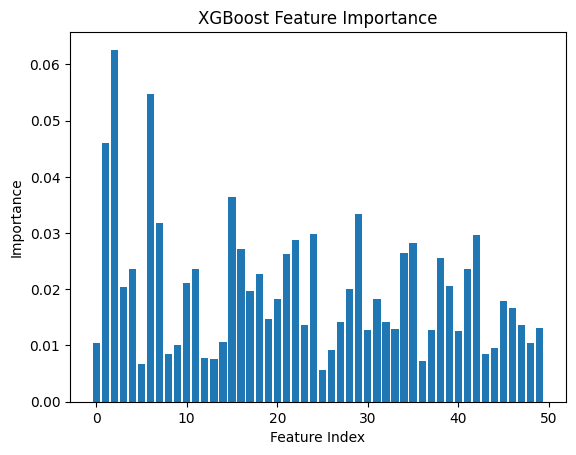

In [15]:
import matplotlib.pyplot as plt
xgb_model.fit(X, Y)
plt.bar(range(X.shape[1]), xgb_model.feature_importances_)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("XGBoost Feature Importance")
plt.show()


c:\Users\saket\Downloads\Projects\Machine Learning Pipeline\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\saket\Downloads\Projects\Machine Learning Pipeline\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\saket\Downloads\Projects\Machine Learning Pipeline\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\saket\Downloads\Projects\Machine Learning Pipeline\.venv\Lib\sit

🎯 Random Forest Cross-Validation Results:
Mean MAE: 0.7016 ± 0.0551
Mean MSE: 0.8027 ± 0.1003
Mean R²: 0.1946 ± 0.0463


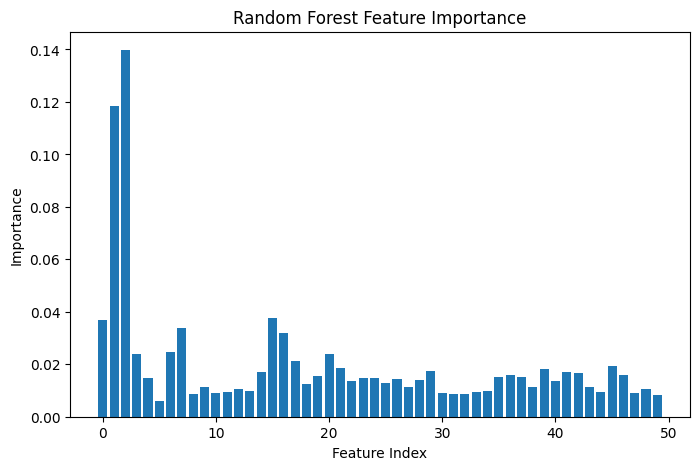

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
mae_scores = []
mse_scores = []
r2_scores = []

for train_idx, val_idx in kf.split(X):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = Y[train_idx], Y[val_idx]

    # Train model
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_val)

    # Evaluate performance
    mae_scores.append(mean_absolute_error(y_val, y_pred))
    mse_scores.append(mean_squared_error(y_val, y_pred))
    r2_scores.append(r2_score(y_val, y_pred))

# Calculate mean and standard deviation of metrics
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Print results
print(f"🎯 Random Forest Cross-Validation Results:")
print(f"Mean MAE: {mean_mae:.4f} ± {std_mae:.4f}")
print(f"Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
print(f"Mean R²: {mean_r2:.4f} ± {std_r2:.4f}")

# Plot Feature Importance
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(8, 5))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [23]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=10, random_state=42)

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = []
mse_scores = []
r2_scores = []

for train_idx, val_idx in kf.split(X):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = Y[train_idx], Y[val_idx]

    # Train model
    lgb_model.fit(X_train, y_train)

    # Predict
    y_pred = lgb_model.predict(X_val)

    # Evaluate
    mae_scores.append(mean_absolute_error(y_val, y_pred))
    mse_scores.append(mean_squared_error(y_val, y_pred))
    r2_scores.append(r2_score(y_val, y_pred))

# Print results
print(f"🎯 LightGBM Cross-Validation Results:")
print(f"Mean MAE: {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
print(f"Mean MSE: {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
print(f"Mean R²: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")


c:\Users\saket\Downloads\Projects\Machine Learning Pipeline\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000925 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6685
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 50
[LightGBM] [Info] Start training from score -0.009970
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

c:\Users\saket\Downloads\Projects\Machine Learning Pipeline\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\saket\Downloads\Projects\Machine Learning Pipeline\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6686
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 50
[LightGBM] [Info] Start training from score 0.025948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\saket\Downloads\Projects\Machine Learning Pipeline\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\saket\Downloads\Projects\Machine Learning Pipeline\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\saket\Downloads\Projects\Machine Learning Pipeline\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\saket\Downloads\Projects\Machine Learning Pipeline\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\saket\Downloads\Projects\Machine Learning Pipeline\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\saket\Downloads\Projects\Machine Learning Pipeline\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\saket\Downloads\Projects\Machine Learning Pipeline\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
